# 5. Confined - Double Porosity Test, Nevada


## Introduction and Conceptual Model

In this following benchmark example, we demonstrate by reproducing Yang (2020) how we can apply TTim in fractured media. We further compare the values obtained in TTim with the ones simulated in AQTESOLV and MLU by Yang (2020)

The example is taken from Kruseman and de Ridder (1990). It is based on a pumping test conducted in a fractured tertiary volcanic aquifer near Yucca Mountains, Nevada, US. Although conventional Darcy's flow is not applied to fracture flow, in this case, we can assume that fracturing is pervasive enough to flow occur as Darcy's flow at the aquifer scale. Flow to the well comes from fractures, while the matrix exchanges water with the fractures.

The borehole has 1219 m depth and penetrated a 400 m thick sequence of fractured volcanic rocks with water entry points. At every entry point, the head is more or less the same, so they have good hydraulic connection. The water table is about 470 m below depth, which indicates confined conditions.

Drawdown data was sampled at the well, named ***UE-25b#1*** and at an observation well, named ***UE-25a#1***, 110 m away. Three pumping tests were conducted at the site and will be the object of our investigation.


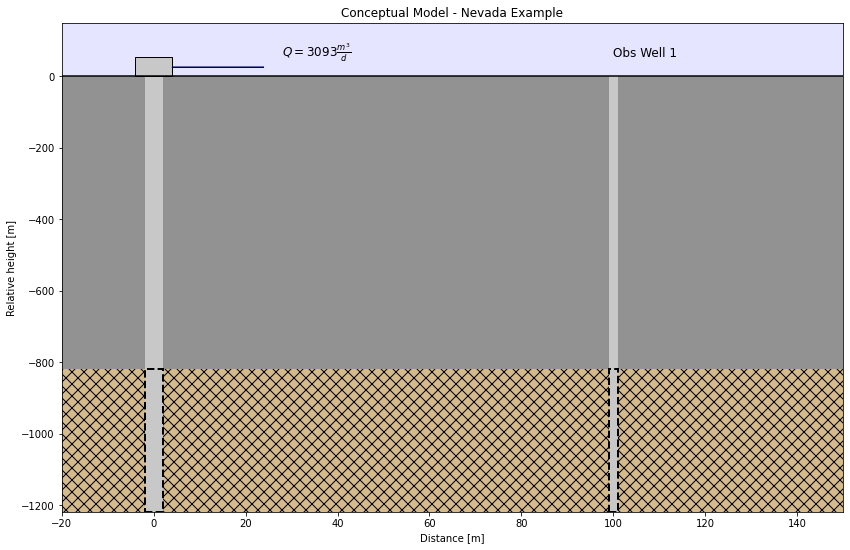

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def conc_confined5():
    ##Now printing the conceptual model figure:

    fig = plt.figure(figsize=(14, 9))
    ax = fig.add_subplot(1,1,1)
    #sky
    sky = plt.Rectangle((-20,0), width = 170, height = 150, fc = 'b', zorder=0, alpha=0.1)
    ax.add_patch(sky)

    #Aquifer:
    ground = plt.Rectangle((-20,-1219), width = 170, height = 400, fc = np.array([209,179,127])/255, zorder=0, alpha=0.9, hatch = 'xx')
    ax.add_patch(ground)

    #Confining bed:
    confining_unit = plt.Rectangle((-20,-1219+400), width = 170, height = 1219-400, fc = np.array([100,100,100])/255, zorder=0, alpha=0.7)
    ax.add_patch(confining_unit)
    well = plt.Rectangle((-2,-1219), width = 4, height = 1219, fc = np.array([200,200,200])/255, zorder=1)
    ax.add_patch(well)

    #Wellhead
    wellhead = plt.Rectangle((-4,0),width = 8, height = 55, fc = np.array([200,200,200])/255, zorder=2, ec='k')
    ax.add_patch(wellhead)

    #Screen for the well:
    screen = plt.Rectangle((-2,-1219), width = 4, height = 400, fc = np.array([200,200,200])/255, alpha=1, zorder = 2, ec = "k", ls = '--')
    screen.set_linewidth(2)
    ax.add_patch(screen)
    pumping_arrow = plt.Arrow(x = 4,y = 25, dx = 20, dy = 0, color = "#00035b", zorder = 3)
    ax.add_patch(pumping_arrow)
    ax.text(x = 28, y = 55, s = r'$ Q = 3093 \frac{m^3}{d}$' , fontsize = 'large')
    #Piezometers
    piez1 = plt.Rectangle((99,-1219), width = 2, height = 1219,fc = np.array([200,200,200])/255, zorder=1)
    screen_piez_1 = plt.Rectangle((99,-1219), width = 2, height = 400, fc = np.array([200,200,200])/255, alpha=1, zorder = 2, ec = "k", ls = '--')
    screen_piez_1.set_linewidth(2)

    ax.add_patch(piez1)

    ax.add_patch(screen_piez_1)

    #last line
    line = plt.Line2D(xdata= [-20,150], ydata = [0,0], color = "k")
    ax.add_line(line)
    ax.text(x = 100, y = 55, s = 'Obs Well 1', fontsize = 'large' )

    ax.set_xlim([-20,150])
    ax.set_ylim([-1219,150])
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Relative height [m]')
    ax.set_title('Conceptual Model - Nevada Example')
    plt.show()

conc_confined5()

## Step 1. Import the Required Libraries

In [2]:
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2. Set the Basic Parameters for the Model

In [3]:
H = 400 #aquifer thickness [m]
Q = 3093.12 #constant pumping rate [m^3/d]

## Step 3. Load Data

Dataset is stored in a text-file for each well, where the first column is the time in days and the second is the drawdown in meters.

In [4]:
#Pumped well UE-25b#1
data1 = np.loadtxt('data/double-porosity-pumpingwell.txt', skiprows = 1)
t1 = data1[:, 0]
h1 = data1[:, 1]

#Observation well UE-25a#1
data2 = np.loadtxt('data/double-porosity-110m.txt', skiprows = 1)
t2 = data2[:, 0]
h2 = data2[:, 1]
r = 110 #distance from obs to pumped well

## Step 4. Create conceptual model

To conceptualize the model in TTim, we have to approximate the fractured system to a possible ModelMaq configuration. We can do this by creating a first layer that represents the matrix of the aquifer, followed by a 1 m thick aquitard and a second layer that represents the fractures.

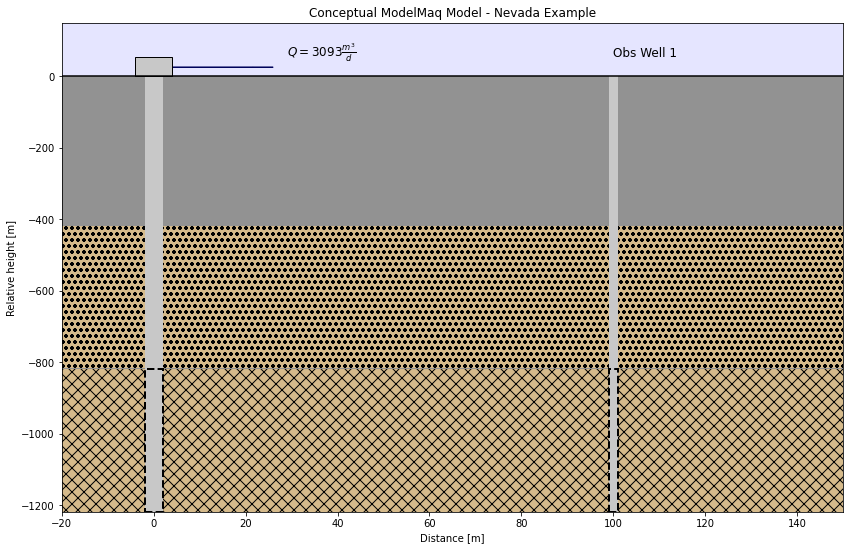

In [5]:
def conc_mmaq_confined5():
    ##Now printing the conceptual model figure:

    fig = plt.figure(figsize=(14, 9))
    ax = fig.add_subplot(1,1,1)
    #sky
    sky = plt.Rectangle((-20,0), width = 170, height = 150, fc = 'b', zorder=0, alpha=0.1)
    ax.add_patch(sky)

    #Aquifer:
    ground_2 =  plt.Rectangle((-20,-1219+401), width = 170, height = 400, fc = np.array([209,179,127])/255, zorder=0, alpha=0.9, hatch = 'oo')
    ax.add_patch(ground_2)
    ground = plt.Rectangle((-20,-1219), width = 170, height = 400, fc = np.array([209,179,127])/255, zorder=0, alpha=0.9, hatch = 'xx')
    ax.add_patch(ground)

    #Confining bed:
    confining_unit_1 = plt.Rectangle((-20,-1219+400), width = 170, height = 1, fc = np.array([100,100,100])/255, zorder=0, alpha=0.7)
    ax.add_patch(confining_unit_1)
    confining_unit = plt.Rectangle((-20,-1219+801), width = 170, height = 1219-801, fc = np.array([100,100,100])/255, zorder=0, alpha=0.7)
    ax.add_patch(confining_unit)
    well = plt.Rectangle((-2,-1219), width = 4, height = 1219, fc = np.array([200,200,200])/255, zorder=1)
    ax.add_patch(well)

    #Wellhead
    wellhead = plt.Rectangle((-4,0),width = 8, height = 55, fc = np.array([200,200,200])/255, zorder=2, ec='k')
    ax.add_patch(wellhead)

    #Screen for the well:
    screen = plt.Rectangle((-2,-1219), width = 4, height = 400, fc = np.array([200,200,200])/255, alpha=1, zorder = 2, ec = "k", ls = '--')
    screen.set_linewidth(2)
    ax.add_patch(screen)
    pumping_arrow = plt.Arrow(x = 4,y = 25, dx = 22, dy = 0, color = "#00035b")
    ax.add_patch(pumping_arrow)
    ax.text(x = 29, y = 55, s = r'$ Q = 3093 \frac{m^3}{d}$', fontsize = 'large' )
    #Piezometers
    piez1 = plt.Rectangle((99,-1219), width = 2, height = 1219,fc = np.array([200,200,200])/255, zorder=1)
    screen_piez_1 = plt.Rectangle((99,-1219), width = 2, height = 400, fc = np.array([200,200,200])/255, alpha=1, zorder = 2, ec = "k", ls = '--')
    screen_piez_1.set_linewidth(2)

    ax.add_patch(piez1)

    ax.add_patch(screen_piez_1)

    #last line
    line = plt.Line2D(xdata= [-20,150], ydata = [0,0], color = "k")
    ax.add_line(line)
    ax.text(x = 100, y = 55, s = 'Obs Well 1', fontsize = 'large' )

    ax.set_xlim([-20,150])
    ax.set_ylim([-1219,150])
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Relative height [m]')
    ax.set_title('Conceptual ModelMaq Model - Nevada Example')
    plt.show()
    
conc_mmaq_confined5()

First, for the TTim model, we will adopt the parameters for the first layer from the results obtained from Kruseman and de Ridder (1970):

In [6]:
km = 0.1 / H #hydraulic conductivity of matrix calculated by K&dR
Sm = 3.85e-4 #specific storage of matrix calculated by K&dR

Now we can construct the two-layer model:
Instructions on how to construct this model are in:
* [Confined 4 - Schroth](confined4_schroty.ipynb)
* [Confined 1 - Oude Korendijk](confined1_oude_korendijk.ipynb)

In [7]:
ml = ModelMaq(kaq=[km, 1], z=[0, -400, -401, -801], c=5, Saq=[Sm, 1e-3],\
              Sll=0, topboundary='conf', tmin=1e-5, tmax=3)
w = Well(ml, xw=0, yw=0, rw=0.11, rc=0, tsandQ=[0, 3093.12], layers=1)
ml.solve()

self.neq  1
solution complete


## Step 5. Calibrate the model using both Datasets

In this calibration procedure, we only calibrate the parameters of the fractured system and keep the matrix values fixed. We also calibrate the wellbore storage parameter ```rc``` that is the radius of the caisson considered for storage.
Instructions on how to set this calibration are in the notebook: [Confined 1 - Oude Korendijk](confined1_oude_korendijk.ipynb)

In [8]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq1', initial=10)
ca.set_parameter(name='Saq1', initial=1e-4, pmin=0)
ca.set_parameter(name='c1', initial=10)
ca.set_parameter_by_reference(name='rc', parameter=w.rc, initial=0)
ca.series(name='UE-25b#1', x=0, y=0, t=t1, h=h1, layer=1)
ca.series(name='UE-25a#1', x=r, y=0, t=t2, h=h2, layer=1)
ca.fit(report=True)
display(ca.parameters)
print('RMSE:', ca.rmse())

.............................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 202
    # data points      = 138
    # variables        = 4
    chi-square         = 5.47351067
    reduced chi-square = 0.04084709
    Akaike info crit   = -437.372019
    Bayesian info crit = -425.663004
[[Variables]]
    kaq1:  0.87695794 +/- 0.00699002 (0.80%) (init = 10)
    Saq1:  5.0880e-06 +/- 5.0676e-07 (9.96%) (init = 0.0001)
    c1:    13.0022029 +/- 1.59709393 (12.28%) (init = 10)
    rc:    0.10560332 +/- 0.00320831 (3.04%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq1, c1)   =  0.858
    C(kaq1, Saq1) = -0.731
    C(Saq1, c1)   = -0.546
    C(Saq1, rc)   = -0.401
    C(kaq1, rc)   =  0.101


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq1,0.876958,6.990018e-03,0.797076,-inf,inf,10,[0.8769579404560144]
Saq1,0.000005,5.067553e-07,9.959802,0.0,inf,0.0001,[5.088005566200593e-06]
c1,13.002203,1.597094e+00,12.283257,-inf,inf,10,[13.002202872175696]
rc,0.105603,3.208310e-03,3.038077,-inf,inf,0,[0.10560331746998722]


RMSE: 0.1991560212203812


Overall, a good fit has been obtained. Reasonable standard deviations of the estimates and a low value for AIC and BIC gives us confidence in the adopted parameters. Now we can check how the results plot with the observations:

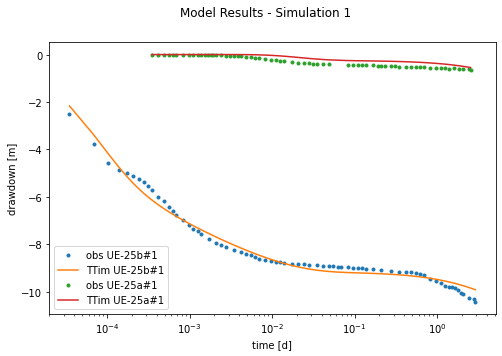

In [9]:
hm1 = ml.head(0, 0, t1)
hm2 = ml.head(110, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs UE-25b#1')
plt.semilogx(t1, hm1[-1], label='TTim UE-25b#1')
plt.semilogx(t2, h2, '.', label='obs UE-25a#1')
plt.semilogx(t2, hm2[-1], label='TTim UE-25a#1')
plt.xlabel('time [d]')
plt.ylabel('drawdown [m]')
plt.suptitle('Model Results - Simulation 1')
plt.legend()
plt.show()


## Step 7. Simulate parameters of both fracture and matrix

Now we will repeat the procedures of steps 5 and 6, but this time we will let TTim find the parameters for both the matrix and the fractures

In [10]:
ml1 = ModelMaq(kaq=[1, 1], z=[0, -400, -401, -801], c=5, Saq=[1e-3, 1e-3],\
              Sll=0, topboundary='conf', tmin=1e-5, tmax=3)
w1 = Well(ml1, xw=0, yw=0, rw=0.11, rc=0, tsandQ=[0, 3093.12], layers=1)
ml1.solve()

self.neq  1
solution complete


In [11]:
ca1 = Calibrate(ml1)
ca1.set_parameter(name='kaq0', initial=1, pmin=0)
ca1.set_parameter(name='Saq0', initial=1e-4, pmin=0)
ca1.set_parameter(name='kaq1', initial=1, pmin=0)
ca1.set_parameter(name='Saq1', initial=1e-4, pmin=0)
ca1.set_parameter(name='c1', initial=100, pmin=0)
ca1.set_parameter_by_reference(name='rc', parameter=w1.rc, initial=0, pmin=0)
ca1.series(name='UE-25b#1', x=0, y=0, t=t1, h=h1, layer=1)
ca1.series(name='UE-25a#1', x=110, y=0, t=t2, h=h2, layer=1)
ca1.fit(report=True)
display(ca1.parameters)
print('RMSE:', ca1.rmse())

................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 461
    # data points      = 138
    # variables        = 6
    chi-square         = 3.50513931
    reduced chi-square = 0.02655409
    Akaike info crit   = -494.877232
    Bayesian info crit = -477.313710
[[Variables]]
    kaq0:  3.2118e-06 +/- 0.00119524 (37214.25%) (init = 1)
    Saq0:  1.4246e-04 +/- 1.4342e-05 (10.07%) (init = 0.0001)
    kaq1:  0.91004516 +/- 0.00604053 (0.66%) (init = 1)
    Saq1:  3.3450e-06 +/- 3.0096e-07 (9.00%) 

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,0.000003,1.195236e-03,37214.250625,0,inf,1,[3.2117705011103226e-06]
Saq0,0.000142,1.434160e-05,10.066948,0,inf,0.0001,[0.00014246228644076986]
kaq1,0.910045,6.040528e-03,0.663761,0,inf,1,[0.9100451583639637]
Saq1,0.000003,3.009565e-07,8.997194,0,inf,0.0001,[3.345003490418108e-06]
c1,15.779933,1.436169e+00,9.101237,0,inf,100,[15.779932871276081]
rc,0.108679,2.528352e-03,2.326443,0,inf,0,[0.10867886827567408]


RMSE: 0.15937239482269086


We see that the fit has slightly improved, as the AIC and BIC values. However, from the table above, one can see that we have low confidence in the hydraulic conductivity of the matrix. Nevertheless, we can see it is a  small value.

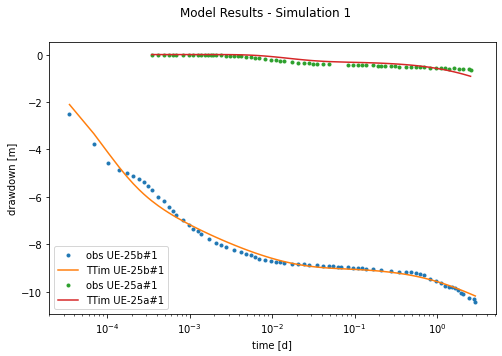

In [12]:
ht1 = ml1.head(0, 0, t1)
ht2 = ml1.head(110, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label = 'obs UE-25b#1')
plt.semilogx(t1, ht1[-1], label = 'TTim UE-25b#1')
plt.semilogx(t2, h2, '.', label = 'obs UE-25a#1')
plt.semilogx(t2, ht2[-1], label = 'TTim UE-25a#1')
plt.xlabel('time [d]')
plt.ylabel('drawdown [m]')
plt.suptitle('Model Results - Simulation 1')
plt.legend()
plt.show()


Overall the curves follow the trends of the drawdown and the fit is good in general.

## Step 8. Analysis and Comparison of the Results under different methods

The final important step is to compare the data obtained from this model with the data from other Aquifer Analysis software. Yang (2020) compared TTim results with the published results in Kruseman and de Ridder (1990), here abbreviated to K&dR, and with the results obtained from the software AQTESOLV (Duffield, 2007) and MLU (Carlson & Randall, 2012).

Kruseman et al. (1970) solved the problem using a graphical method, where the transmissivity was calculated as one aquifer and the storativity was separated between matrix and fractures. The MLU (Carlson & Randall, 2012) solution used a similar approach to our TTim model by simulating the matrix as a very-low transmissivity aquifer on top of the fractured aquifer and separated by a zero-storage aquitard. Yang (2020) solved the problem in AQTESOLV using a double-porosity analytical solution proposed by Moench (1984).


In [13]:
t = pd.DataFrame(columns=['km [m/d]', 'Sm [1/m]', 'kf [m/d]', 'Sf [1/m]', 'c', 'rc'], \
                index=['K&dR', #'Moench',
                       'AQTESOLV', 'MLU', 'TTim1', 'TTim2'])
t.loc['TTim1'] = np.concatenate((np.array([0.00025, 3.850e-04]),ca.parameters['optimal'].values))
t.loc['TTim2'] = ca1.parameters['optimal'].values
t.loc['K&dR'] = [0.8325, 3.750e-4, 0.8325, 4.000e-6, '-', '-']
#t.loc['Moench'] = [0.1728, 3.000e-4, 0.864, 1.500e-6, '-', '-'] # I don't know where these values for Moench come from
t.loc['AQTESOLV'] = [0.149, 5.512e-4, 0.937, 5.533e-6, '-', 0.11]
t.loc['MLU'] = [0.00025, 3.850e-04, 0.874, 8.053e-6, 12.380, 0.1]
t['RMSE'] = ['-', 0.031736,
             0.434638, ca.rmse(), ca1.rmse()]
t

,km [m/d],Sm [1/m],kf [m/d],Sf [1/m],c,rc,RMSE
K&dR,0.8325,0.000375,0.8325,0.000004,-,-,-
AQTESOLV,0.149,0.000551,0.937,0.000006,-,0.11,0.031736
MLU,0.00025,0.000385,0.874,0.000008,12.38,0.1,0.434638
TTim1,0.00025,0.000385,0.876958,0.000005,13.002203,0.105603,0.199156
TTim2,0.000003,0.000142,0.910045,0.000003,15.779933,0.108679,0.159372


Overall, TTim model 1 showed similar results to MLU but with a slightly better fit. AQTESOLV obtained the best fit using Moench's analytical solution.

### Step 8.1. Comparison of estimates and model error

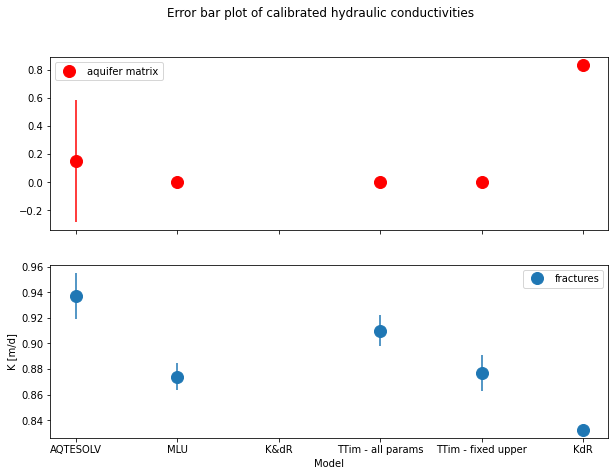

In [14]:
# Preparing the DataFrame:
t1 = pd.DataFrame(columns=['kaq - opt -l1', 'kaq - 95% -l1','kaq - opt -l2', 'kaq - 95% -l2' ], index = ['AQTESOLV','MLU','K&dR','TTim - all params', 'TTim - fixed upper']) 
simulation = ['AQTESOLV','MLU','K&dR','TTim - rc', 'TTim - fixed upper']
t1.loc['MLU'] = [0.00025,  np.nan,0.874, 1.221*1e-2*0.874]
t1.loc['KdR'] = [0.8325, np.nan, 0.8325, np.nan]
t1.loc['AQTESOLV'] = [0.149,291.236*1e-2*0.149,0.937,1.946*1e-2*0.937]
t1.loc['TTim - fixed upper'] = [0.00025,np.nan,ca.parameters.loc['kaq1','optimal'],2*ca.parameters.loc['kaq1','std']]
t1.loc['TTim - all params'] = [ca1.parameters.loc['kaq0','optimal'],2*ca1.parameters.loc['kaq0','std'],ca1.parameters.loc['kaq1','optimal'],2*ca1.parameters.loc['kaq1','std']]

# Plotting

#plt.figure(figsize = (10,7))
fig,ax = plt.subplots(2,1, figsize = (10,7), sharex = True)
ax[0].errorbar(x = t1.index, y = t1['kaq - opt -l1'], yerr = [t1['kaq - 95% -l1'], t1['kaq - 95% -l1']],
    marker='o', linestyle='', markersize=12, label = 'aquifer matrix', color = 'red')
ax[0].legend()
ax[1].errorbar(x = t1.index, y = t1['kaq - opt -l2'], yerr = [t1['kaq - 95% -l2'], t1['kaq - 95% -l2']],
    marker='o', linestyle='', markersize=12, label = 'fractures')

plt.legend()
plt.suptitle("Error bar plot of calibrated hydraulic conductivities")
plt.ylabel('K [m/d]')
#plt.ylim([278,289])
plt.xlabel('Model');

Hydraulic conductivities varied between simulations. When estimated, the matrix conductivity had higher uncertainty. Uncertainty ranges are similar for the fractured portion. However, the solutions do not always overlap each other.

## Reference

* Carlson F, Randall J (2012) MLU: a Windows application for the analysis of aquifer tests and the design of well fields in layered systems. Ground Water 50(4):504–510
* Duffield, G.M., 2007. AQTESOLV for Windows Version 4.5 User's Guide, HydroSOLVE, Inc., Reston, VA.
* Kruseman GP, De Ridder NA (1990) Analysis and evaluation of pumping test data, 2nd edn. ILRI Publ. 47, ILRI, Wageningen, The Netherlands
* Moench, A. F. (1984), Double-Porosity Models for a Fissured Groundwater Reservoir With Fracture Skin, Water Resour. Res., 20( 7), 831– 846, doi:10.1029/WR020i007p00831.
* Yang, Xinzhu (2020) Application and comparison of different methodsfor aquifer test analysis using TTim. Master Thesis, Delft University of Technology (TUDelft), Delft, The Netherlands.

#### Next Notebook: [Leaky 1 - Dalem](leaky1_dalem.ipynb)